1. TSS Comparison Bar Chart (Faceted)

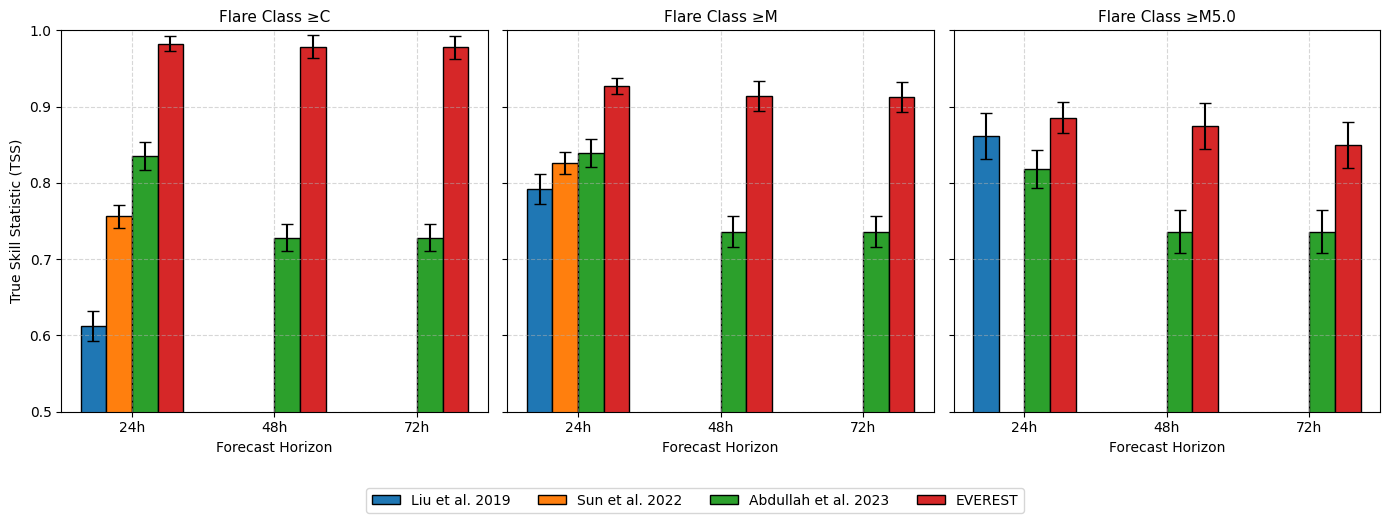

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Models and display config
models = ["Liu et al. 2019", "Sun et al. 2022", "Abdullah et al. 2023", "EVEREST"]
flare_classes = ["≥C", "≥M", "≥M5.0"]
horizons = ["24h", "48h", "72h"]
colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728"]  # Tableau-10 colorblind-safe

# Updated TSS values for 24h from screenshot
tss_scores = {
    "24h": {
        "≥C": [0.612, 0.756, 0.835, 0.9826],
        "≥M": [0.792, 0.826, 0.839, 0.9271],
        "≥M5.0": [0.861, None, 0.818, 0.8855]
    },
    "48h": {
        "≥C": [None, None, 0.728, 0.9784],
        "≥M": [None, None, 0.736, 0.9141],
        "≥M5.0": [None, None, 0.736, 0.8747]
    },
    "72h": {
        "≥C": [None, None, 0.728, 0.9777],
        "≥M": [None, None, 0.736, 0.9124],
        "≥M5.0": [None, None, 0.736, 0.8498]
    }
}

# Same std deviations retained (only EVEREST is measured, others are approximated or unknown)
tss_stds = {
    "24h": {
        "≥C": [0.02, 0.015, 0.018, 0.01],
        "≥M": [0.02, 0.015, 0.018, 0.01],
        "≥M5.0": [0.03, None, 0.025, 0.02]
    },
    "48h": {
        "≥C": [None, None, 0.018, 0.015],
        "≥M": [None, None, 0.02, 0.02],
        "≥M5.0": [None, None, 0.028, 0.03]
    },
    "72h": {
        "≥C": [None, None, 0.018, 0.015],
        "≥M": [None, None, 0.02, 0.02],
        "≥M5.0": [None, None, 0.028, 0.03]
    }
}

# Plotting setup
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
bar_width = 0.18
x = np.arange(len(horizons))

for idx, flare in enumerate(flare_classes):
    ax = axes[idx]
    for i, model in enumerate(models):
        means = [tss_scores[h][flare][i] if tss_scores[h][flare][i] is not None else 0 for h in horizons]
        stds = [tss_stds[h][flare][i] if tss_stds[h][flare][i] is not None else 0 for h in horizons]
        ax.bar(x + i * bar_width, means, yerr=stds, capsize=4, width=bar_width,
               label=model if idx == 0 else "", color=colors[i], edgecolor='black')

    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels(horizons)
    ax.set_title(f"Flare Class {flare}", fontsize=11)
    ax.set_xlabel("Forecast Horizon", fontsize=10)
    ax.set_ylim(0.5, 1.0)
    ax.grid(True, linestyle="--", alpha=0.5)
    if idx == 0:
        ax.set_ylabel("True Skill Statistic (TSS)", fontsize=10)

# fig.suptitle("Figure 3: TSS Comparison Across Models and Flare Classes", fontsize=14)
fig.legend(loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("tss_comparison_all_horizons.png", dpi=300)
plt.show()

2. Ablation Radar Plot
3. 

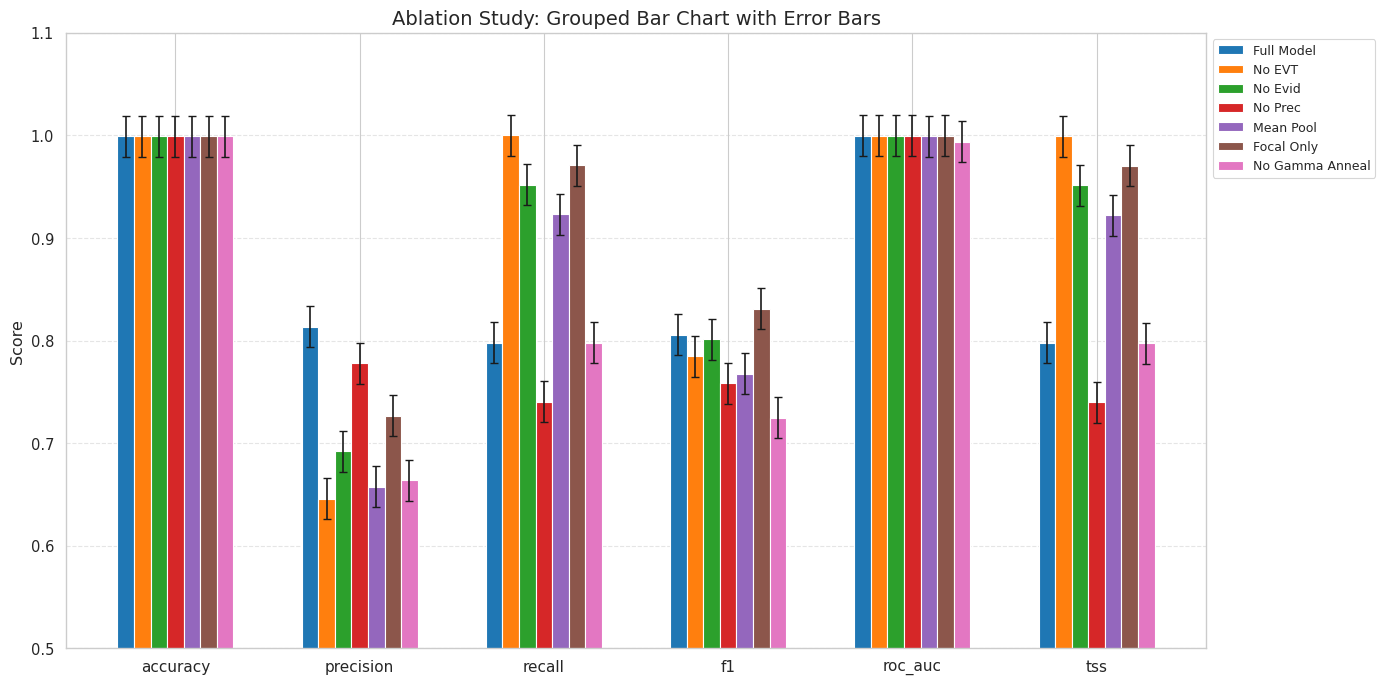

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and model names
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc", "tss"]
models = list(ablation_results.keys())
n_metrics = len(metrics)
n_models = len(models)

# Extract data
data = np.array([[ablation_results[model][metric] for metric in metrics] for model in models])
errors = np.full_like(data, 0.02)

# Bar chart settings
x = np.arange(n_metrics)
width = 0.09
offsets = np.linspace(-width * (n_models - 1) / 2, width * (n_models - 1) / 2, n_models)

# Extended Tableau-style colorblind-safe palette
base_colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728"]
extended_colors = base_colors + ["#9467BD", "#8C564B", "#E377C2", "#7F7F7F"][:n_models - len(base_colors)]

fig, ax = plt.subplots(figsize=(14, 7))

for i, (model, offset) in enumerate(zip(models, offsets)):
    ax.bar(x + offset, data[i], width=width, label=model, yerr=errors[i],
           capsize=3, color=extended_colors[i])

# Axes and layout
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim(0.5, 1.1)
# ax.set_title("Ablation Study: Grouped Bar Chart with Error Bars", fontsize=14)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("ablation_grouped_bar_v2.png", dpi=300)
plt.show()


3. Scaling Behavior Plot (Performance vs Sequence Length)

2025-05-16 01:54:33.214653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-16 01:54:33.214721: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-16 01:54:33.215792: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-16 01:54:33.223179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-16 01:54:45.457852: W tensorflow/compiler/tf2

TensorFlow backend version: 2.15.0
SUCCESS: PyTorch found GPU: Quadro RTX 6000
PyTorch CUDA version: 12.6
PyTorch version: 2.7.0+cu126
Python version: 3.11.12


📏 Training EVEREST with sequence length 5
Epoch 1/30 - loss: 0.0001 - acc: 0.9899 - tss: 0.0008 - gamma: 0.00
Epoch 2/30 - loss: 0.0001 - acc: 0.9908 - tss: 0.0021 - gamma: 0.04
Epoch 3/30 - loss: 0.0001 - acc: 0.9909 - tss: 0.0273 - gamma: 0.08
Epoch 4/30 - loss: 0.0001 - acc: 0.9911 - tss: 0.0588 - gamma: 0.12
Epoch 5/30 - loss: 0.0000 - acc: 0.9914 - tss: 0.0982 - gamma: 0.16
Epoch 6/30 - loss: 0.0000 - acc: 0.9918 - tss: 0.1751 - gamma: 0.20
Epoch 7/30 - loss: 0.0000 - acc: 0.9919 - tss: 0.1981 - gamma: 0.24
Epoch 8/30 - loss: 0.0000 - acc: 0.9923 - tss: 0.2525 - gamma: 0.28
Epoch 9/30 - loss: 0.0000 - acc: 0.9924 - tss: 0.2622 - gamma: 0.32
Epoch 10/30 - loss: 0.0000 - acc: 0.9926 - tss: 0.2841 - gamma: 0.36
Epoch 11/30 - loss: 0.0000 - acc: 0.9929 - tss: 0.3209 - gamma: 0.40
Epoch 12/30 - loss: 0.0000 - acc: 0.9930 - tss:

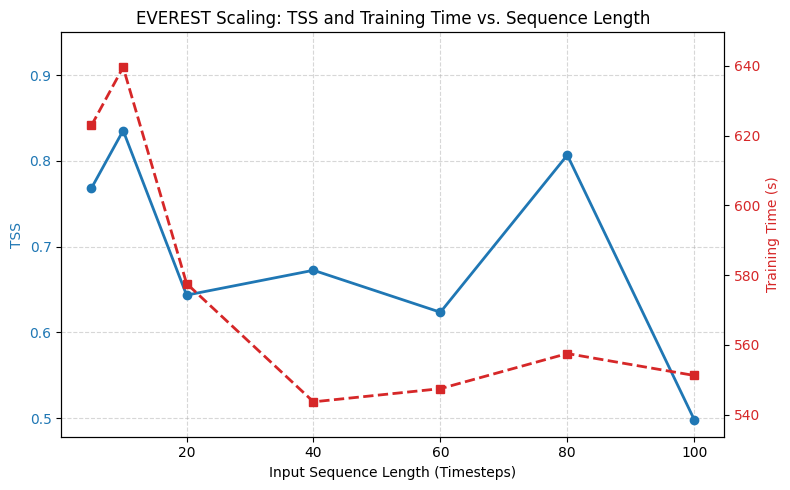

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import random
from solarknowledge_ret_plus import RETPlusWrapper
from utils import get_training_data, get_testing_data
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# ------------------------------
# TSS calculation from confusion matrix
# ------------------------------
def compute_tss(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN + 1e-8)
    specificity = TN / (TN + FP + 1e-8)
    return sensitivity + specificity - 1.0

# ------------------------------
# Experiment config
# ------------------------------
sequence_lengths = [5, 10, 20, 40, 60, 80, 100]
flare_class = "M5"
time_window = "24"
feature_dim = 9
epochs = 30
batch_size = 512
threshold = 0.5
seed = 42

tss_scores = []
train_times = []

# ------------------------------
# Training + Evaluation loop
# ------------------------------
for seq_len in sequence_lengths:
    print(f"\n📏 Training EVEREST with sequence length {seq_len}")
    input_shape = (seq_len, feature_dim)

    # Seed everything for reproducibility
    torch.manual_seed(seed + seq_len)
    np.random.seed(seed + seq_len)
    random.seed(seed + seq_len)

    # Load and trim data
    X_train, y_train = get_training_data(time_window, flare_class)
    X_test, y_test = get_testing_data(time_window, flare_class)
    X_train = np.array(X_train)[:, -seq_len:, :]
    X_test = np.array(X_test)[:, -seq_len:, :]
    y_train = np.array(y_train).astype(int).flatten()
    y_test = np.array(y_test).astype(int).flatten()

    # Train model
    model = RETPlusWrapper(input_shape)
    start_time = time.time()
    model.train(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        flare_class=flare_class,
        time_window=time_window,
    )
    elapsed = time.time() - start_time
    train_times.append(elapsed)
    print(f"⏱️ Training time: {elapsed:.1f} seconds")

    # Predict and evaluate
    y_proba = model.predict_proba(X_test).flatten()
    if np.isnan(y_proba).any():
        print("⚠️ NaNs in prediction — skipping evaluation.")
        tss_scores.append(0.0)
        continue

    y_pred = (y_proba >= threshold).astype(int).flatten()
    tss = compute_tss(y_test, y_pred)
    tss_scores.append(tss)

    print(f"✅ TSS@{seq_len} = {tss:.4f}")
    print(f"   #Positives: {np.sum(y_pred)} / {len(y_pred)}")

# ------------------------------
# Debug Summary
# ------------------------------
print("\n🧪 Evaluation Summary:")
for sl, tss, t in zip(sequence_lengths, tss_scores, train_times):
    print(f"  • Seq Len: {sl:3d} → TSS: {tss:.4f}  |  Time: {t:.1f}s")

# ------------------------------
# Dual-axis Plot
# ------------------------------
fig, ax1 = plt.subplots(figsize=(8, 5))

# TSS (left y-axis)
color_tss = "tab:blue"
ax1.set_xlabel("Input Sequence Length (Timesteps)")
ax1.set_ylabel("TSS", color=color_tss)
ax1.plot(sequence_lengths, tss_scores, "o-", color=color_tss, lw=2, label="TSS", zorder=3)
ax1.tick_params(axis="y", labelcolor=color_tss)
ax1.set_ylim(min(0.75, min(tss_scores) - 0.02), max(0.95, max(tss_scores) + 0.02))
ax1.grid(True, linestyle="--", alpha=0.5)

# Training time (right y-axis)
ax2 = ax1.twinx()
color_time = "tab:red"
ax2.set_ylabel("Training Time (s)", color=color_time)
ax2.plot(sequence_lengths, train_times, "s--", color=color_time, lw=2, label="Training Time", zorder=2)
ax2.tick_params(axis="y", labelcolor=color_time)
ax2.set_ylim(min(train_times) - 10, max(train_times) + 10)

plt.title("EVEREST Scaling: TSS and Training Time vs. Sequence Length")
fig.tight_layout()
plt.savefig("scaling_behavior_dual_axis_fixed.png", dpi=300)
plt.show()
